# TensorFlow

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.16.1


In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Число цилиндров', 'Объем', 'Мощность', 'Вес',
                'Ускорение', 'Год', 'Происхождение']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [5]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Число цилиндров,Объем,Мощность,Вес,Ускорение,Год,Происхождение
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
dataset.isna().sum()

MPG                0
Число цилиндров    0
Объем              0
Мощность           6
Вес                0
Ускорение          0
Год                0
Происхождение      0
dtype: int64

Так как пропусков всего 6 и они в графе мощность, то проще всего удалить их

In [7]:
dataset = dataset.dropna()

In [8]:
dataset['Происхождение'] = dataset['Происхождение'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Происхождение'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Число цилиндров,Объем,Мощность,Вес,Ускорение,Год,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


In [9]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

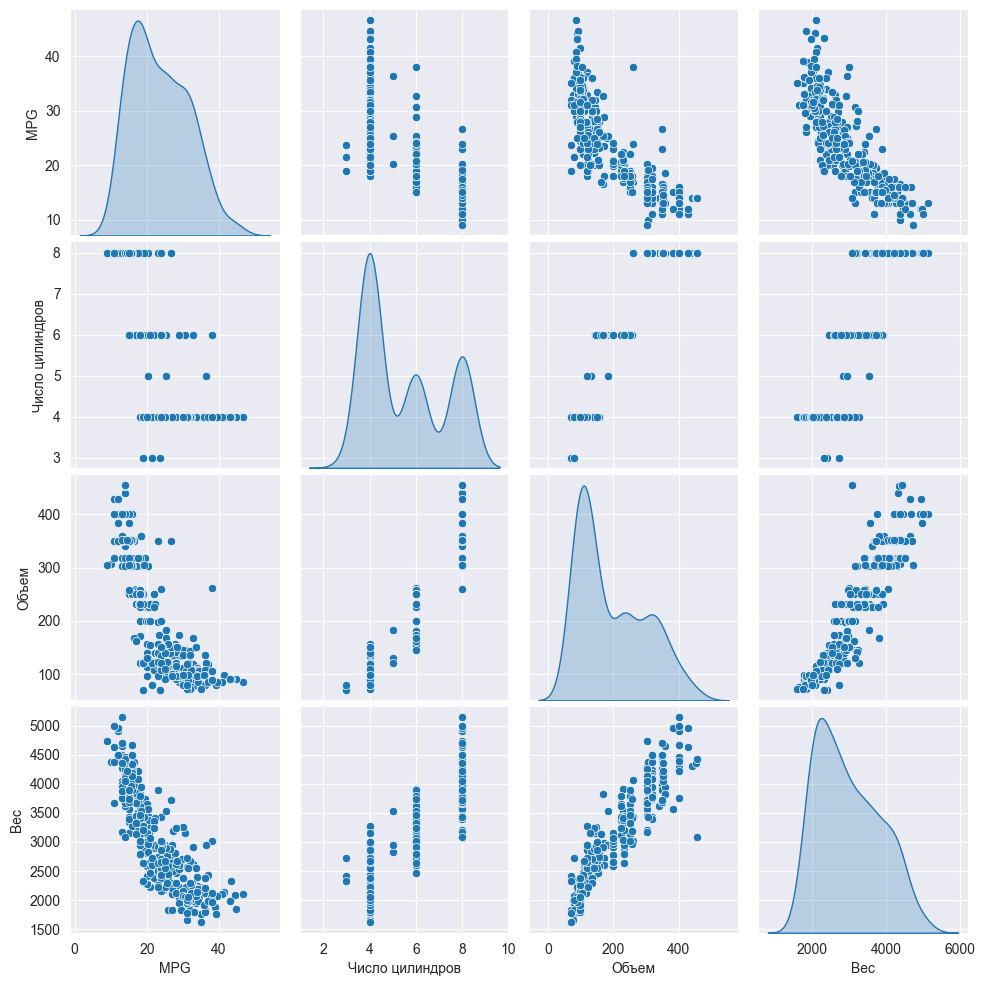

In [10]:
sns.pairplot(train_dataset[['MPG', 'Число цилиндров', 'Объем', 'Вес']], diag_kind='kde')

In [11]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.599361,7.956255,9.0,17.0,23.0,30.0,46.6
Число цилиндров,313.0,5.482428,1.700446,3.0,4.0,4.0,8.0,8.0
Объем,313.0,195.517572,103.766567,70.0,105.0,151.0,302.0,455.0
Мощность,313.0,104.594249,38.283669,46.0,76.0,95.0,129.0,230.0
Вес,313.0,2986.124601,841.133957,1613.0,2234.0,2855.0,3645.0,5140.0
Ускорение,313.0,15.544089,2.817864,8.0,13.5,15.5,17.3,24.8
Год,313.0,76.207668,3.630136,70.0,73.0,76.0,79.0,82.0


In [12]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [13]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [14]:
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[5.48242807e+00 1.95517578e+02 1.04594246e+02 2.98612451e+03
  1.55440893e+01 7.62076645e+01 1.53354630e-01 2.01277956e-01
  6.45367384e-01]]


In [15]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [16]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ ?                      │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [17]:
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

In [19]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

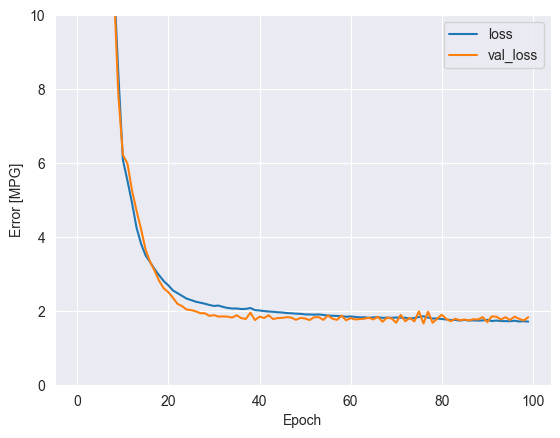

In [20]:
plot_loss(history)

In [21]:
test_results = {'dnn_model': dnn_model.evaluate(test_features, test_labels, verbose=0)}

In [22]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
dnn_model,1.676107


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


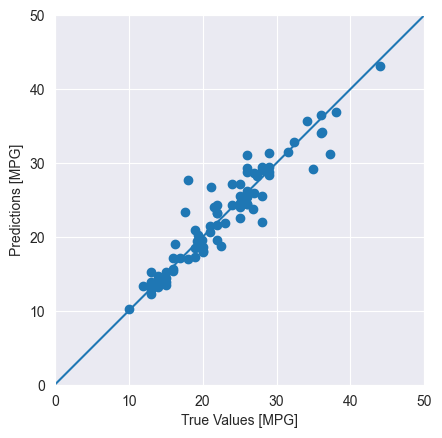

In [23]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# PyTorch

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [25]:
train_dataset

,MPG,Число цилиндров,Объем,Мощность,Вес,Ускорение,Год,Europe,Japan,USA
260,18.6,6,225.0,110.0,3620.0,18.7,78,False,False,True
184,25.0,4,140.0,92.0,2572.0,14.9,76,False,False,True
174,18.0,6,171.0,97.0,2984.0,14.5,75,False,False,True
64,15.0,8,318.0,150.0,4135.0,13.5,72,False,False,True
344,39.0,4,86.0,64.0,1875.0,16.4,81,False,False,True
...,...,...,...,...,...,...,...,...,...,...
72,15.0,8,304.0,150.0,3892.0,12.5,72,False,False,True
107,18.0,6,232.0,100.0,2789.0,15.0,73,False,False,True
272,23.8,4,151.0,85.0,2855.0,17.6,78,False,False,True
352,29.9,4,98.0,65.0,2380.0,20.7,81,False,False,True


In [56]:
X_train = train_dataset.copy()
X_test = test_dataset.copy()

y_train = X_train['MPG'].values
X_train = X_train.drop(columns=['MPG']).values

y_test = X_test['MPG'].values
X_test = X_test.drop(columns=['MPG']).values

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [59]:
class NeuralNetworkModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetworkModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_dim = X_train_tensor.shape[1]  # Number of features
hidden_dim = 64
output_dim = 1

model = NeuralNetworkModel(input_dim, hidden_dim, output_dim)

In [60]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [61]:
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 13.7482
Epoch [20/100], Loss: 9.1090
Epoch [30/100], Loss: 7.9570
Epoch [40/100], Loss: 7.5453
Epoch [50/100], Loss: 7.3287
Epoch [60/100], Loss: 7.1832
Epoch [70/100], Loss: 7.0732
Epoch [80/100], Loss: 6.9863
Epoch [90/100], Loss: 6.9088
Epoch [100/100], Loss: 6.8434


In [62]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 6.6038


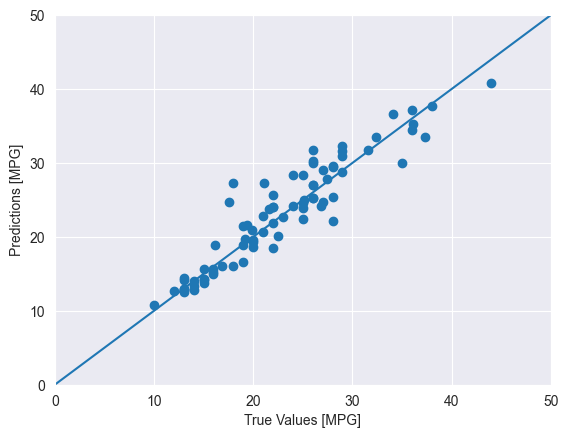

In [63]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0, 50])
plt.show()

Вывод: оба метода показали схожие результаты, но PyTorch оказался чуть менее точным, возможно потому, что я не полностью повторил архитектуру модели из TensorFlow